## Importing requried libraries


In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as lb

## Upload dataset from external csv

In [44]:
df = pd.read_csv("boston_house_prices.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Describing the dataset to check the mean, max and min values.

In [45]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visually looking at the growth of each variable

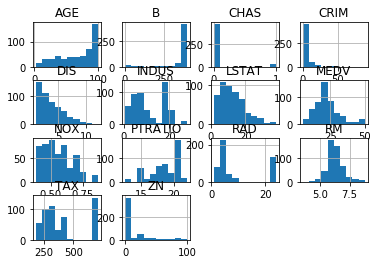

In [46]:
df.hist()
plt.show()

## Checking the relationship between various independent variables and MEDV (price)

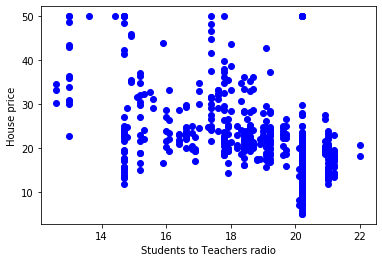

In [47]:
plt.scatter(df.PTRATIO, df.MEDV, color="blue")
plt.xlabel("Students to Teachers radio")
plt.ylabel("House price")
plt.show()

In [48]:
df.columns.delete(13)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

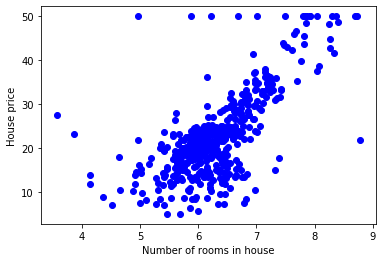

In [49]:
plt.scatter(df.RM, df.MEDV, color="blue")
plt.xlabel("Number of rooms in house")
plt.ylabel("House price")
plt.show()

# There is a non-linear relationship between House price and Room in house

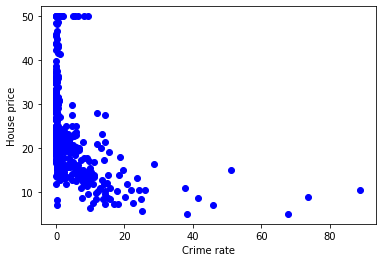

In [50]:
plt.scatter(df.CRIM, df.MEDV, color="blue")
plt.xlabel("Crime rate")
plt.ylabel("House price")
plt.show()

##
# From the graph we can see that the House prices increases when there is a no crime rate. 
# However there are some houses which located in a high crime rate area but still expensive then houses located in 
# low crime rate area.
##

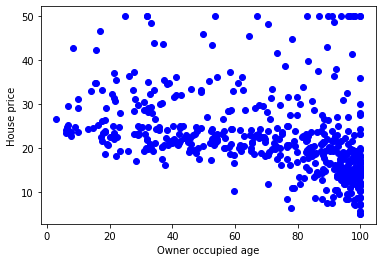

In [51]:
plt.scatter(df.AGE, df.MEDV, color="blue")
plt.xlabel("Owner occupied age")
plt.ylabel("House price")
plt.show()

##
# There is a non-linear relationship between Age and MEDV
# Trend shows that house prices are lower for old age owners
##

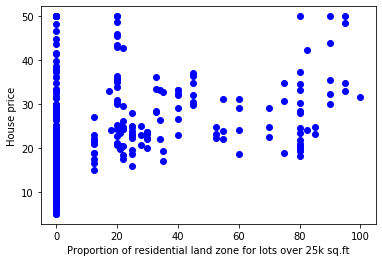

In [52]:
plt.scatter(df.ZN, df.MEDV, color="blue")
plt.xlabel("Proportion of residential land zone for lots over 25k sq.ft")
plt.ylabel("House price")
plt.show()

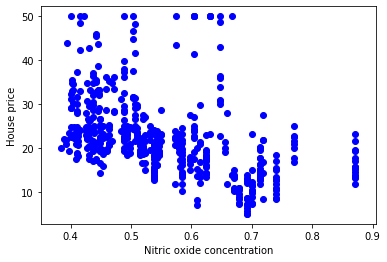

In [53]:
plt.scatter(df.NOX, df.MEDV, color="blue")
plt.xlabel("Nitric oxide concentration")
plt.ylabel("House price")
plt.show()

##
# Non-linear relationship
# Higher prices of house where there is a low Nitric Oxide concentration
##

In [54]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

## Polynomial regression with RM and MEDV

In [55]:
from sklearn.preprocessing import PolynomialFeatures 

train_x = np.asanyarray(train[['RM']])
train_y = np.asanyarray(train[['MEDV']])

test_x = np.asanyarray(test[['RM']])
test_y = np.asanyarray(test[['MEDV']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.12    , 37.4544  ],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

#### Converting the polynomial regression into multiple linear regression

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x_poly, train_y)
print("Coefficient : {}".format(model.coef_))
print(model.coef_)
print("Intercept : {}".format(model.intercept_))

Coefficient : [[  0.         -23.99313617   2.53825474]]
[[  0.         -23.99313617   2.53825474]]
Intercept : [71.71758696]


#### Fitted line against data

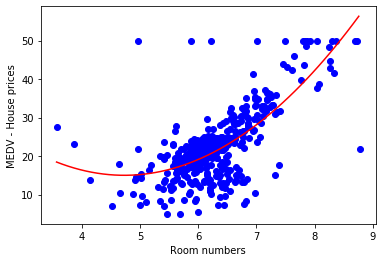

In [57]:
plt.scatter(train.RM, train.MEDV, color="blue")
XX = np.arange(np.min(train.RM), np.max(train.RM), 0.1)
yy = model.intercept_[0]+ model.coef_[0][1]*XX+ model.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Room numbers")
plt.ylabel("MEDV - House prices")
plt.show()


XX = np.arange(0.0, 10.0, 0.1)
XX

#### Evaluation of the model features (RM)

In [58]:
from sklearn.metrics import r2_score

test_y_ = model.predict(poly.fit_transform(test_x))

print("Mean absolute error: {}".format(np.mean(np.absolute(test_y_ - test_y))))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 3.901445768861007
Residual sum of squares (MSE): 29.05
R2-score: 0.24


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generic method for training, testing and evaluating a dataset using Polynomial Regression
def teachModelPoly(df, features, target, degree):
    train, test = train_test_split(df, 0.8)
    
    print("Features --------------------- {}".format(features))
    
    # Training independent and dependent variables
    train_x = np.asanyarray(train[features if type(features) == type(list) else [features]])
    train_y = np.asanyarray(train[[target]])
    
    # Test independent and dependent variables
    test_x = np.asanyarray(test[features if type(features) == type(list) else [features]])
    test_y = np.asanyarray(test[[target]])
    
    # Converting the polynomaial regression into multple linear regression
    poly = PolynomialFeatures(degree=degree)
    train_x = poly.fit_transform(train_x)
    test_x = poly.fit_transform(test_x)
    
    if type(features) != type([]):
        plt.scatter(df[features], df[target], color="blue")
        plt.xlabel(features[0])
        plt.ylabel(target)
        plt.show()
    
    # Teaching the model
    model = LinearRegression()
    model.fit(test_x, test_y)
    print("Model trained")
    
    # Evalutating the model 
    print("")
    print("Coefficents : {}".format(model.coef_))
    print("Intercept : {}".format(model.intercept_))
    print("")
    
    if type(features) != type([]):
        plt.scatter(df[features], df[target], color="blue")
        XX = np.arange(np.min(df[features]), np.max(df[features]), 0.1)
        YY = model.intercept_[0]
        for i in range(1, degree+1):
            YY+=model.coef_[0][i]*np.power(XX, i)
        plt.plot(XX, YY, 'r')
        plt.xlabel(features)
        plt.ylabel(target)
        plt.show()
        
    # Predicting the values and finding the accuracy 
    from sklearn.metrics import r2_score
    
    y_hat = model.predict(test_x)
    print("Result --- ")
    print("")
    print("Mean Absolute Error : {}".format(np.mean(np.absolute(y_hat - test_y))))
    print("Mean Squared Error : {}".format(np.mean((y_hat-test_y)**2)))
    print("R2-score : {}".format(r2_score(y_hat, test_y)))
    print("")
    return model
    
def train_test_split(df, ratio):
    msk = np.random.rand(len(df))< ratio
    train = df[msk]
    test = df[~msk]
    return train, test

Features --------------------- CRIM


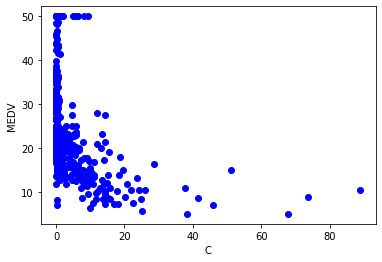

Model trained

Coefficents : [[ 0.00000000e+00 -1.09924718e+00  2.69492934e-02 -1.65293408e-04]]
Intercept : [23.87891723]



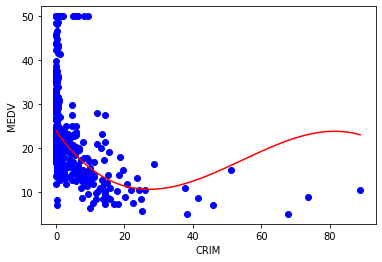

Result --- 

Mean Absolute Error : 4.677494304588242
Mean Squared Error : 46.4752032246558
R2-score : -2.028749956214473

Features --------------------- ZN


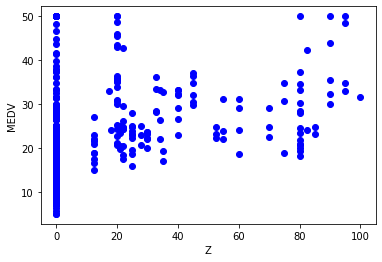

Model trained

Coefficents : [[ 0.00000000e+00  8.73609802e-01 -2.73358308e-02  2.23094076e-04]]
Intercept : [21.12988634]



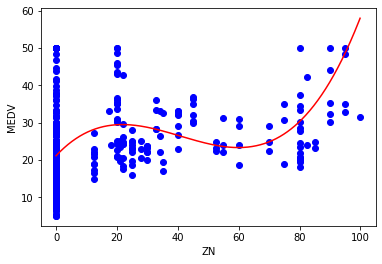

Result --- 

Mean Absolute Error : 6.70038812138784
Mean Squared Error : 87.39299688428187
R2-score : -3.6133189808147135

Features --------------------- INDUS


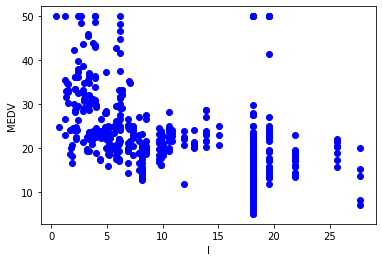

Model trained

Coefficents : [[ 0.00000000e+00 -2.10839996e+00  8.32343756e-02 -1.13377498e-03]]
Intercept : [34.7996836]



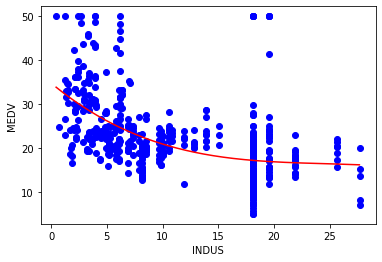

Result --- 

Mean Absolute Error : 5.298171196166179
Mean Squared Error : 47.333183913711
R2-score : -1.012614162582763

Features --------------------- CHAS


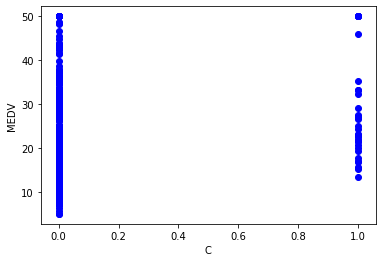

Model trained

Coefficents : [[ 0.         -0.86769231 -0.86769231 -0.86769231]]
Intercept : [22.52307692]



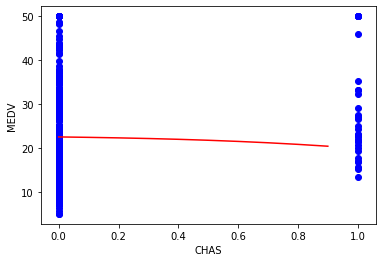

Result --- 

Mean Absolute Error : 6.554735866543095
Mean Squared Error : 79.56995736793327
R2-score : -206.42767475739916

Features --------------------- NOX


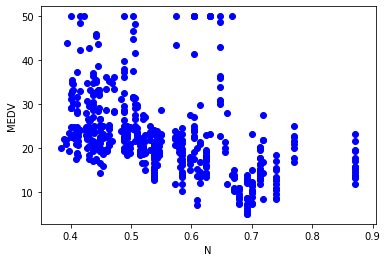

Model trained

Coefficents : [[   0.          -12.04008104 -122.97464046  109.82723471]]
Intercept : [47.12835931]



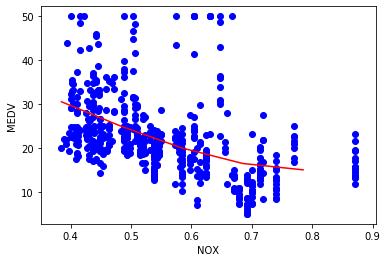

Result --- 

Mean Absolute Error : 5.052127351736155
Mean Squared Error : 52.21201981372887
R2-score : -1.2463018286163137

Features --------------------- RM


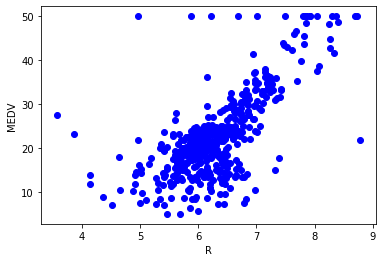

Model trained

Coefficents : [[   0.         -175.52681758   25.7754146    -1.16311698]]
Intercept : [395.3536228]



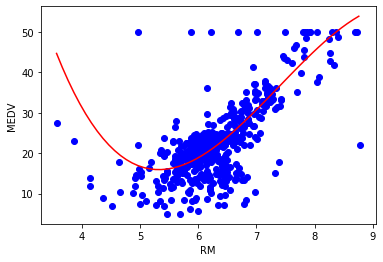

Result --- 

Mean Absolute Error : 3.5625725204933016
Mean Squared Error : 22.205628694813
R2-score : 0.6323155820068278

Features --------------------- AGE


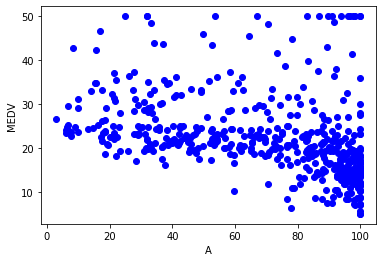

Model trained

Coefficents : [[ 0.00000000e+00  3.46984845e-01 -8.02156716e-03  3.95649124e-05]]
Intercept : [25.44909158]



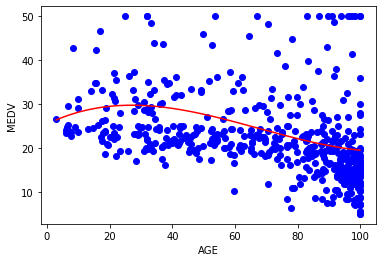

Result --- 

Mean Absolute Error : 6.83062304164453
Mean Squared Error : 82.3309746244234
R2-score : -4.377340044742886

Features --------------------- DIS


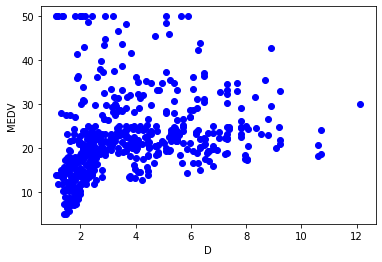

Model trained

Coefficents : [[ 0.         10.99360746 -1.92898268  0.10082477]]
Intercept : [5.24115079]



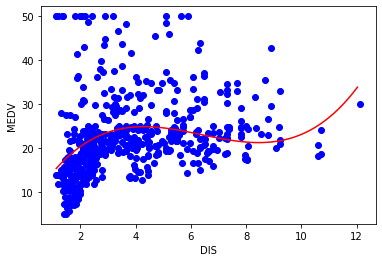

Result --- 

Mean Absolute Error : 6.315274558684476
Mean Squared Error : 77.95424115578115
R2-score : -12.743004300604547

Features --------------------- RAD


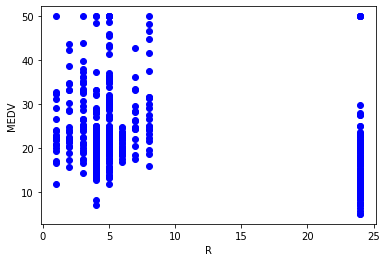

Model trained

Coefficents : [[ 0.         -4.88857419  0.76311954 -0.0244459 ]]
Intercept : [32.7635693]



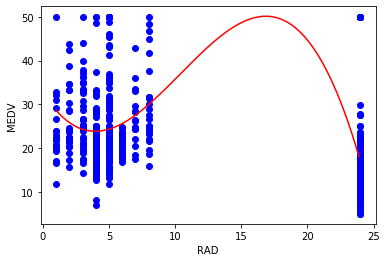

Result --- 

Mean Absolute Error : 6.396451350561605
Mean Squared Error : 79.71685023089552
R2-score : -4.2784037300884386

Features --------------------- TAX


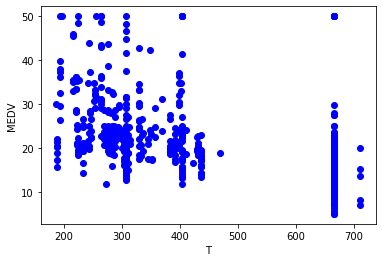

Model trained

Coefficents : [[ 0.00000000e+00 -4.97576107e-01  1.18795574e-03 -9.17566747e-07]]
Intercept : [91.5591151]



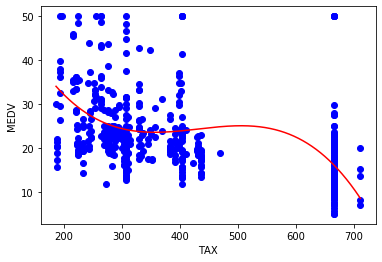

Result --- 

Mean Absolute Error : 6.574047387540092
Mean Squared Error : 78.43076167372567
R2-score : -2.447186486103068

Features --------------------- PTRATIO


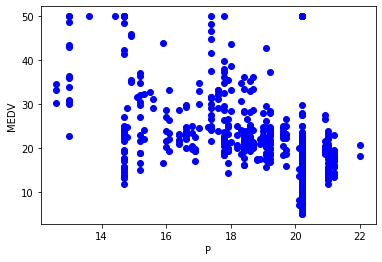

Model trained

Coefficents : [[  0.         -14.09372056   1.16867264  -0.03031206]]
Intercept : [76.01299624]



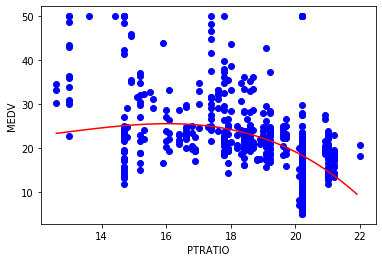

Result --- 

Mean Absolute Error : 5.744403336443259
Mean Squared Error : 65.00375561834119
R2-score : -3.8621866040239476

Features --------------------- B


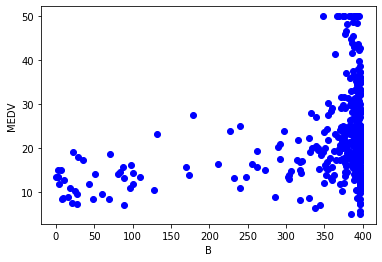

Model trained

Coefficents : [[ 0.00000000e+00  3.57700098e-02  4.74621997e-05 -1.42695255e-07]]
Intercept : [11.81258045]



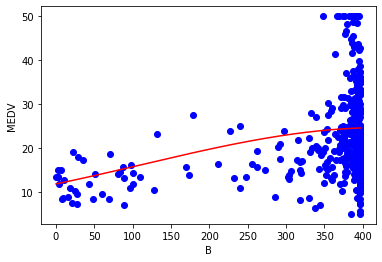

Result --- 

Mean Absolute Error : 6.361534213114816
Mean Squared Error : 73.4101060395948
R2-score : -5.137250767104603

Features --------------------- LSTAT


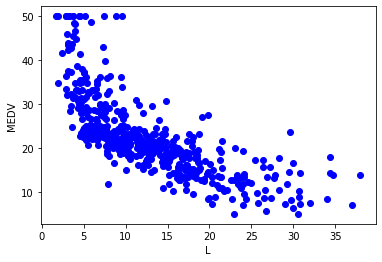

Model trained

Coefficents : [[ 0.00000000e+00 -3.60972531e+00  1.24164924e-01 -1.42614161e-03]]
Intercept : [48.2615556]



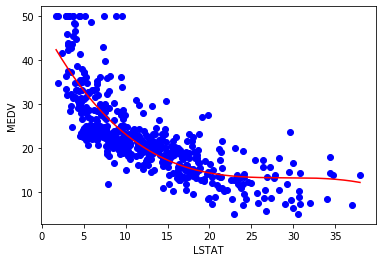

Result --- 

Mean Absolute Error : 3.8139803991501444
Mean Squared Error : 27.440139131380196
R2-score : 0.46129865778075374

Features --------------------- MEDV


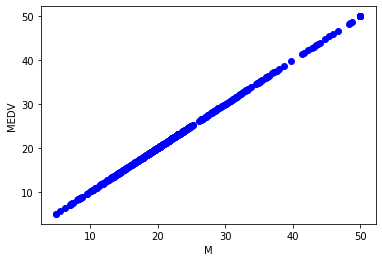

Model trained

Coefficents : [[0.00000000e+00 1.00000000e+00 5.95082083e-15 1.44075691e-17]]
Intercept : [3.89732691e-12]



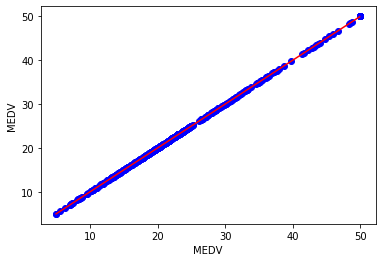

Result --- 

Mean Absolute Error : 6.210416796210876e-13
Mean Squared Error : 7.325878007847094e-25
R2-score : 1.0



In [60]:
## Maximum R2-score in each iteration
#
# Degree = 2 and features = 'LSTAT' , R2-score = 0.58
# Degree = 3 and features = 'LSTAT' , R2-score = 0.70
# Degree = 4 and features = 'LSTAT' , R2-score = 0.60 
# Degree = 5 and features = 'LSTAT' , R2-score = 0.50
# Degree = 10 and features = 'LSTAT' , R2-score = 0.58
#
##

counter = 0
for cols in df.columns:
    if counter == len(df)-1:
        break
    teachModelPoly(features=cols, target='MEDV', df=df, degree=3)
    counter+=1